In [46]:
import nltk
from textblob import TextBlob
import sklearn



In [10]:
import sys
import os
print(os.getcwd())


c:\Users\Lenovo\desktop\Finance_news\Finances_Analysis\notebooks


In [9]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import warnings
warnings.filterwarnings('ingnore')

In [17]:
data = pd.read_csv('C:/Users/Lenovo/Desktop/raw_analyst_ratings.csv')

In [14]:
import sys
sys.path.append(r'C:\Users\Lenovo\Desktop\Finance_news\Finances_Analysis\scripts')  # Use the correct absolute path
import pandas as pd
from finance_function import (
    calculate_headline_lengths, 
    count_articles_per_publisher, 
    analyze_publication_dates, 
    plot_daily_counts
)


from finance_function import perform_sentiment_analysis, perform_topic_modeling


In [ ]:
import scripts.finance_function
print(dir(scripts.finance_function))

In [3]:
{
    "python.analysis.extraPaths": [
        "./scripts"
    ]
}

{'python.analysis.extraPaths': ['./scripts']}

In [14]:

data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.to_csv('C:/Users/Lenovo/Desktop/raw_analyst_ratings.csv', index=False)

In [15]:
data.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [36]:
print(data['date'].head(10))

0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
Name: date, dtype: object


In [16]:
data.tail()

,headline,url,publisher,date,stock
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [33]:
try:
    data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, errors='raise')
except ValueError as e:
    print("Error in datetime conversion:", e)
    print("Problematic data:\n", data.loc[data['date'].apply(lambda x: not isinstance(x, pd.Timestamp))])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4472\1161603091.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, errors='raise')


Error in datetime conversion: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Problematic data:
                                                   headline  \
0                  Stocks That Hit 52-Week Highs On Friday   
1               Stocks That Hit 52-Week Highs On Wednesday   
2                            71 Biggest Movers From Friday   
3             46 Stocks Moving In Friday's Mid-Day Session   
4        B of A Securities Maintains Neutral on Agilent...   
...                                                    ...   
1407323             Top Narrow Based Indexes For August 29   
1407324  Recap: We

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [18]:
data.describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [19]:
data.columns

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [20]:
data.shape

(1407328, 5)

In [21]:
dataframe = pd.DataFrame(data)
print(dataframe)

                                                  headline  \
0                  Stocks That Hit 52-Week Highs On Friday   
1               Stocks That Hit 52-Week Highs On Wednesday   
2                            71 Biggest Movers From Friday   
3             46 Stocks Moving In Friday's Mid-Day Session   
4        B of A Securities Maintains Neutral on Agilent...   
...                                                    ...   
1407323             Top Narrow Based Indexes For August 29   
1407324  Recap: Wednesday's Top Percentage Gainers and ...   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326  Oppenheimer Initiates China Zenix At Outperfor...   
1407327  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1        https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2        htt

In [24]:
data.nunique()

headline     845770
url          883429
publisher      1034
date          39957
stock          6204
dtype: int64

In [29]:
data['stock'].unique()

array(['A', 'AA', 'AAC', ..., 'ZU', 'ZUMZ', 'ZX'], dtype=object)

In [30]:
data['headline'].unique()

array(['Stocks That Hit 52-Week Highs On Friday',
       'Stocks That Hit 52-Week Highs On Wednesday',
       '71 Biggest Movers From Friday', ...,
       'UPDATE: Oppenheimer Color on China Zenix Auto Initiation',
       'Oppenheimer Initiates China Zenix At Outperform, $8 PT',
       'China Zenix Auto International Opens For Trading at $6.00; IPO Price Set at $6.00'],
      dtype=object)

In [25]:
data.isnull().sum()


headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [26]:
# calculate headline lenght
headline_lengths_stats = calculate_headline_lengths(data)
print("Headline Lengths Statistics:")
print(headline_lengths_stats)

Headline Lengths Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [27]:
#Count articles per publisher
publisher_counts = count_articles_per_publisher(data)
print("\nNumber of Articles Per Publisher:")
print(publisher_counts)


Number of Articles Per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [40]:
# Analyze publication dates
daily_counts = analyze_publication_dates(data)
print("\nDaily Counts of Articles:")
print(daily_counts.head())



Daily Counts of Articles:
date
2009-02-14    1
2009-02-15    0
2009-02-16    0
2009-02-17    0
2009-02-18    0
Freq: D, dtype: int64


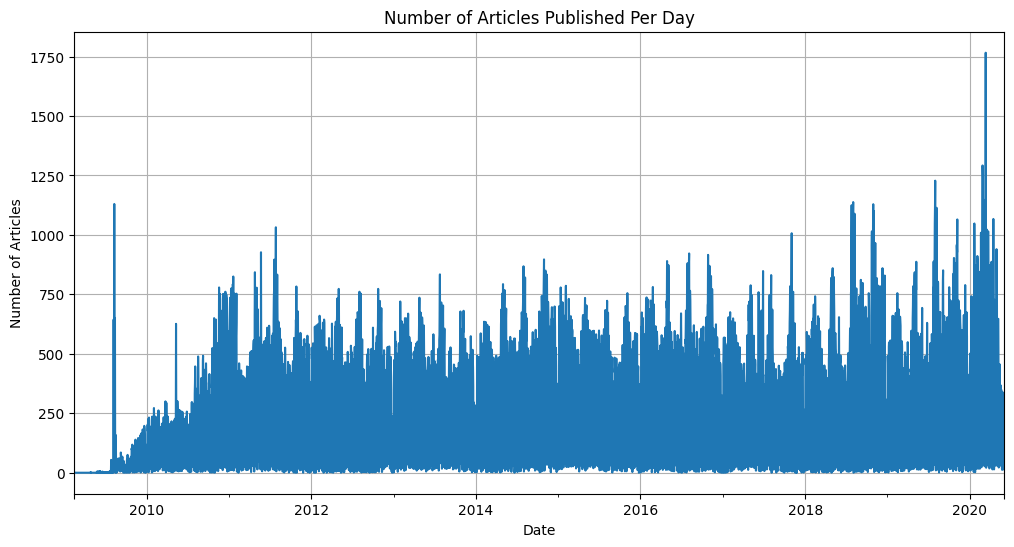

In [41]:

# Plot daily counts
plot_daily_counts(daily_counts)

In [15]:
## sentimental and modeling

sentiment
neutral     934914
positive    341178
negative    131236
Name: count, dtype: int64


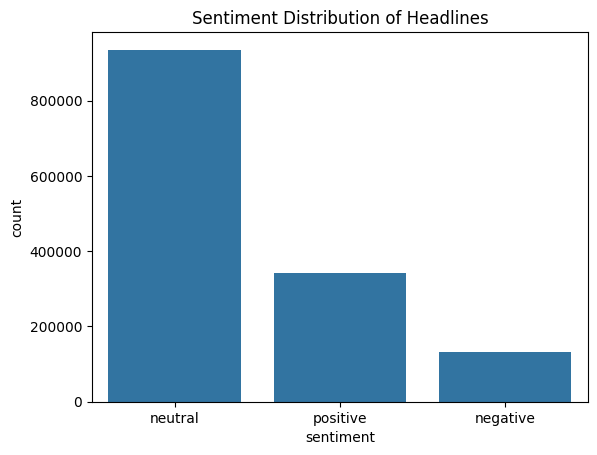

In [20]:
data, sentiment_counts = perform_sentiment_analysis(data)
print(sentiment_counts)
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution of Headlines')
plt.show()
